对豆瓣Top250与IMDbTop250的数据分析与对比

简介：

豆瓣是国内最大的影迷社区和电影数据库，用户绝大多数为中国影迷；IMDB是全世界最大的电影数据库，用户来自世界各地，但美国影迷占据了很大一部分。两个榜单都具备着鲜明的特性，因此可以用豆瓣数据来代替中国影迷的观点，用IMDB数据代替美国影迷的观点。

首先分别爬取豆瓣Top250和IMDBTop250的相关信息（这里对IMDBTop250的数据用多种方法均爬取失败，可能是IMDB有更加严格的反爬措施，故使用了Kaggle上的数据库内的数据来代替）

In [1]:
import requests 
from lxml import etree
import pandas as pd
df = []
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4343.0 Safari/537.36',
           'Referer': 'https://movie.douban.com/top250'}
columns = ['排名','电影名称','导演','上映年份','制作国家','类型','评分','评价人数']
def get_data(html):
    xp = etree.HTML(html)
    lis = xp.xpath('//*[@id="content"]/div/div[1]/ol/li')
    for li in lis:
        """排名、标题、导演、演员、"""
        ranks = li.xpath('div/div[1]/em/text()')
        titles = li.xpath('div/div[2]/div[1]/a/span[1]/text()')
        directors = li.xpath('div/div[2]/div[2]/p[1]/text()')[0].strip().replace("\xa0\xa0\xa0","\t").split("\t")
        infos = li.xpath('div/div[2]/div[2]/p[1]/text()')[1].strip().replace('\xa0','').split('/')
        dates,areas,genres = infos[0],infos[1],infos[2]
        ratings = li.xpath('.//div[@class="star"]/span[2]/text()')[0]
        scores = li.xpath('.//div[@class="star"]/span[4]/text()')[0][:-3]
        for rank,title,director in zip(ranks,titles,directors):
            df.append([rank,title,director,dates,areas,genres,ratings,scores])
        d = pd.DataFrame(df,columns=columns)
        d.to_csv('DouBanTop250.csv',index=False)
for i in range(0,251,25):
    url = "https://movie.douban.com/top250?start={}&filter=".format(str(i))
    res = requests.get(url,headers=headers)
    html = res.text
    get_data(html)

一、Top250电影的上映年份组成

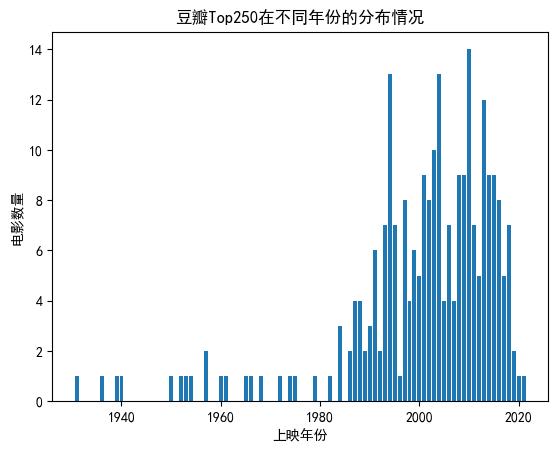

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

release_years = df['上映年份'].str.extract('(\d{4})')[0].astype(int)

year_counts = release_years.value_counts().sort_index()

plt.bar(year_counts.index, year_counts.values)
plt.xlabel('上映年份')
plt.ylabel('电影数量')
plt.title('豆瓣Top250在不同年份的分布情况')
plt.show()

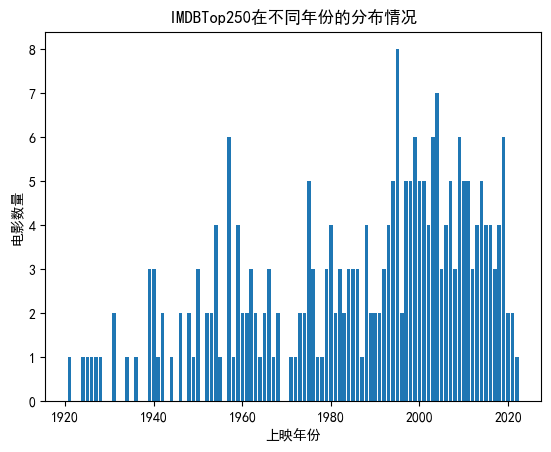

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('IMDBTop250.csv')

release_years = df['year'].astype(str).str.extract('(\d{4})')[0].astype(int)

year_counts = release_years.value_counts().sort_index()

plt.bar(year_counts.index, year_counts.values)
plt.xlabel('上映年份')
plt.ylabel('电影数量')
plt.title('IMDBTop250在不同年份的分布情况')
plt.show()

年份数据点太多太乱不够直观，因此对数据点进行整合，以每十年为一个年代

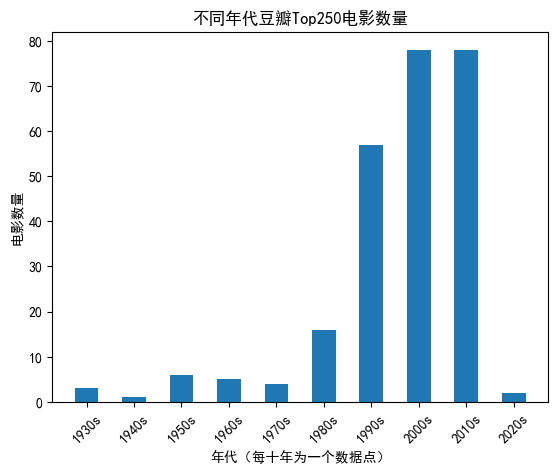

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

release_years = df['上映年份'].str.extract('(\d{4})')[0].astype(int)

decade_counts = ((release_years // 10) * 10).value_counts().sort_index()

plt.bar(decade_counts.index, decade_counts.values, width=5)
plt.xticks(ticks=decade_counts.index, labels=[str(i)+'s' for i in decade_counts.index], rotation=45)
plt.xlabel('年代（每十年为一个数据点）')
plt.ylabel('电影数量')
plt.title('不同年代豆瓣Top250电影数量')
plt.show()

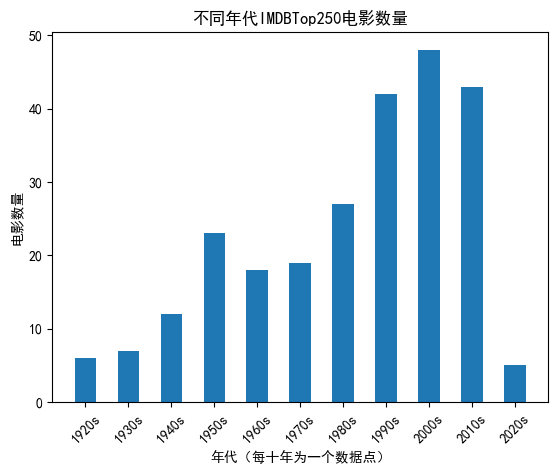

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('IMDBTop250.csv')

release_years = df['year'].astype(str).str.extract('(\d{4})')[0].astype(int)

decade_counts = ((release_years // 10) * 10).value_counts().sort_index()

plt.bar(decade_counts.index, decade_counts.values, width=5)
plt.xticks(ticks=decade_counts.index, labels=[str(i)+'s' for i in decade_counts.index], rotation=45)
plt.xlabel('年代（每十年为一个数据点）')
plt.ylabel('电影数量')
plt.title('不同年代IMDBTop250电影数量')
plt.show()

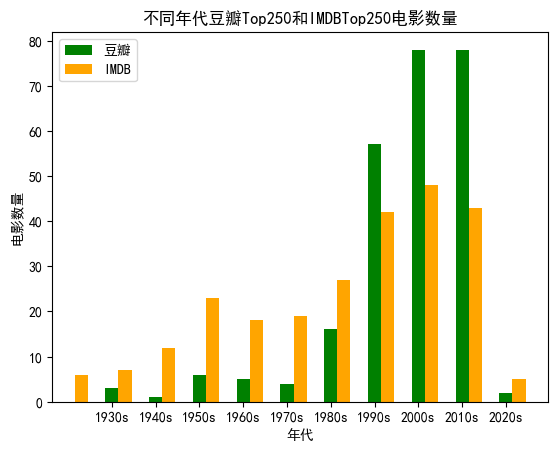

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

df_douban = pd.read_csv('DouBanTop250.csv')
release_years_douban = df_douban['上映年份'].str.extract('(\d{4})')[0].astype(float)

df_imdb = pd.read_csv('IMDBTop250.csv')
release_years_imdb = df_imdb['year'].astype(str).str.extract('(\d{4})')[0].astype(float)

decade_counts_douban = release_years_douban.groupby((release_years_douban//10)*10).size()
decade_counts_imdb = release_years_imdb.groupby((release_years_imdb//10)*10).size()

plt.bar(decade_counts_douban.index, decade_counts_douban.values, width=3, align='center', color='green', label='豆瓣')
plt.bar(decade_counts_imdb.index + 3, decade_counts_imdb.values, width=3, align='center', color='orange', label='IMDB')

plt.xlabel('年代')
plt.ylabel('电影数量')
plt.title('不同年代豆瓣Top250和IMDBTop250电影数量')
plt.xticks(ticks=decade_counts_douban.index, labels=[str(int(i))+'s' for i in decade_counts_douban.index])
plt.legend()

plt.show()

通过分析豆瓣与IMDB的数据图，我们发现两者的数据都主要集中在00年左右，而对于在90年代之前的数据，IMDB的电影数量明显多于豆瓣的电影数量，可以看出IMDb比豆瓣更偏爱90年代以前的老电影

二、Top250的制作国家组成

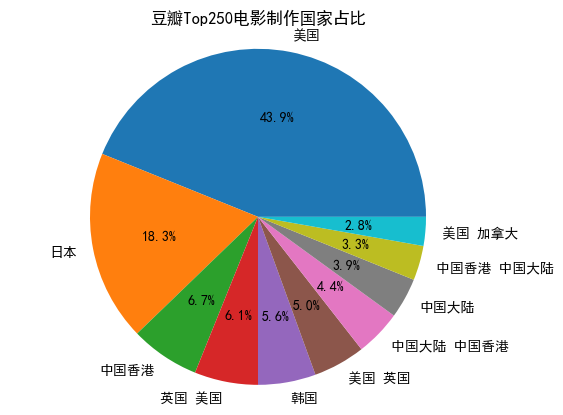

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

country_counts = df['制作国家'].value_counts()

top_10_countries = country_counts.head(10)

plt.pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('豆瓣Top250电影制作国家占比')
plt.show()

如果按制作国家一栏分类情况太多太杂，所以对制作国家一栏取第一制作国家来进行统计

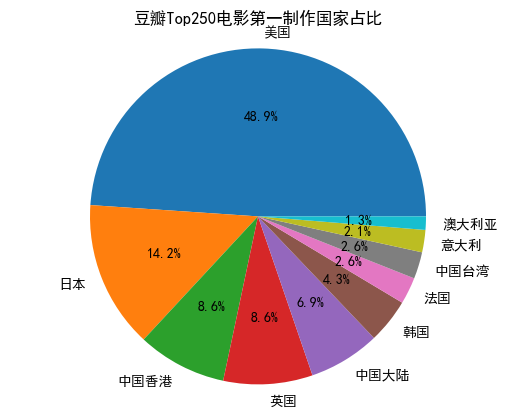

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

first_country = df['制作国家'].str.split(' ').str[0]

country_counts = first_country.value_counts()

top_10_countries = country_counts.head(10)

plt.pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('豆瓣Top250电影第一制作国家占比')
plt.show()

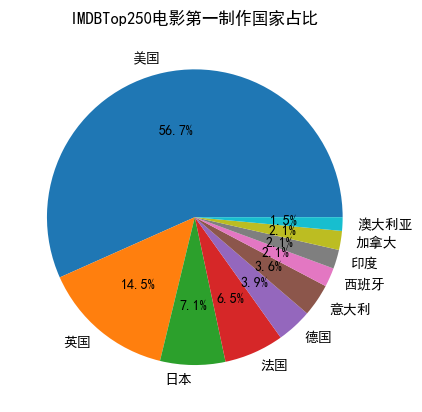

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('imdb.csv')

country_mapping = {
    'United States': '美国',
    'United Kingdom': '英国',
    'Germany': '德国',
    'Canada': '加拿大',
    'France': '法国',
    'Japan': '日本',
    'Italy': '意大利',
    'Australia': '澳大利亚',
    'India': '印度',
    'Spain': '西班牙',
}

country_counts = {}
for countries in df['country']:
    if isinstance(countries, str):
        countries = countries.split(',')
        for country in countries:
            country = country.strip()
            if country in country_counts:
                country_counts[country] += 1
            else:
                country_counts[country] = 1

top_countries = sorted(country_counts, key=country_counts.get, reverse=True)[:10]

translated_countries = [country_mapping.get(country, country) for country in top_countries]

labels = translated_countries
values = [country_counts[country] for country in top_countries]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('IMDBTop250电影第一制作国家占比')
plt.show()

对于IMDB的数据，由于是全英文的，所以需要对其进行简单的翻译

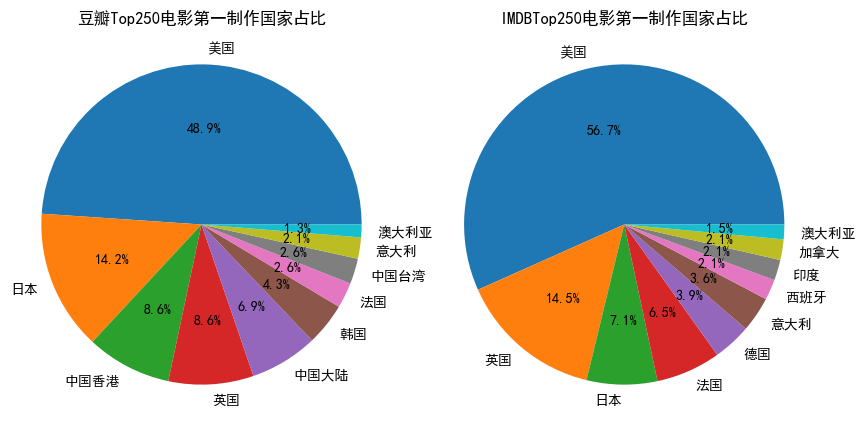

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

first_country = df['制作国家'].str.split(' ').str[0]

country_counts = first_country.value_counts()

top_10_countries = country_counts.head(10)

fig = plt.figure(figsize=(10, 5))

df = pd.read_csv('imdb.csv')

country_mapping = {
    'United States': '美国',
    'United Kingdom': '英国',
    'Germany': '德国',
    'Canada': '加拿大',
    'France': '法国',
    'Japan': '日本',
    'Italy': '意大利',
    'Australia': '澳大利亚',
    'India': '印度',
    'Spain': '西班牙',
}

country_counts = {}
for countries in df['country']:
    if isinstance(countries, str):
        countries = countries.split(',')
        for country in countries:
            country = country.strip()
            if country in country_counts:
                country_counts[country] += 1
            else:
                country_counts[country] = 1

top_countries = sorted(country_counts, key=country_counts.get, reverse=True)[:10]

translated_countries = [country_mapping.get(country, country) for country in top_countries]

labels = translated_countries
values = [country_counts[country] for country in top_countries]

plt.subplot(1,2,1)
plt.pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('豆瓣Top250电影第一制作国家占比')

plt.subplot(1,2,2)
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('IMDBTop250电影第一制作国家占比')
plt.axis('equal')

plt.show()

通过分析豆瓣与IMDB的饼图，我们发现两者的数据占比最多的都是美国的电影，豆瓣第二多的国家是中国（中国香港、中国台湾和中国大陆加起来的比例），而IMDB却是英国，两者的第三名同样是日本。两者排行第一都是美国，足以见得美国电影不仅在自己国家的观众中得到了认可，还赢得到了中国观众的青睐，但在豆瓣排行第二的中国，反而在IMDB中排不上号，说明我们的电影在美国的认可度没有那么高，由此可见我国在电影发展方面依旧是道阻且长。

三、Top250的电影类型组成

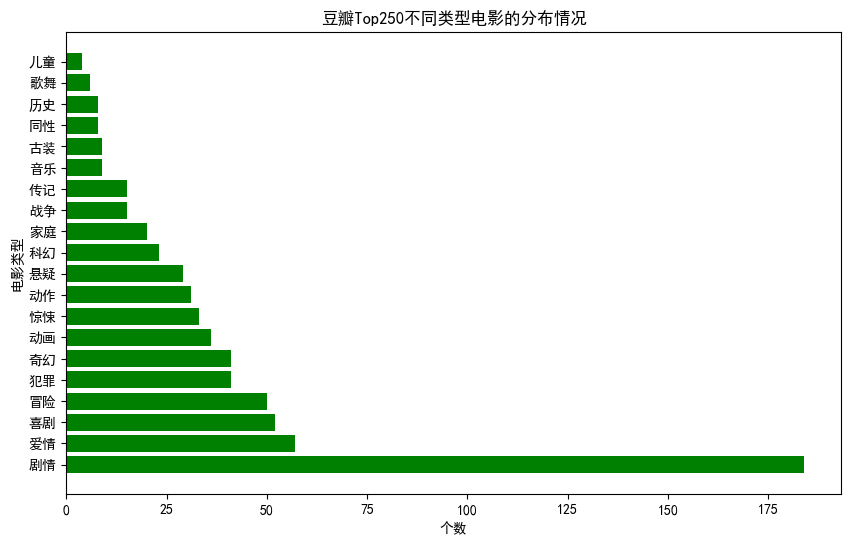

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

genres = df['类型'].str.split(' ').sum()
genre_counts = dict(Counter(genres))

genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:20]}

plt.figure(figsize=(10, 6))
plt.barh(list(genre_counts.keys()), list(genre_counts.values()), color='green')
plt.xlabel('个数')
plt.ylabel('电影类型')
plt.title('豆瓣Top250不同类型电影的分布情况')
plt.show()

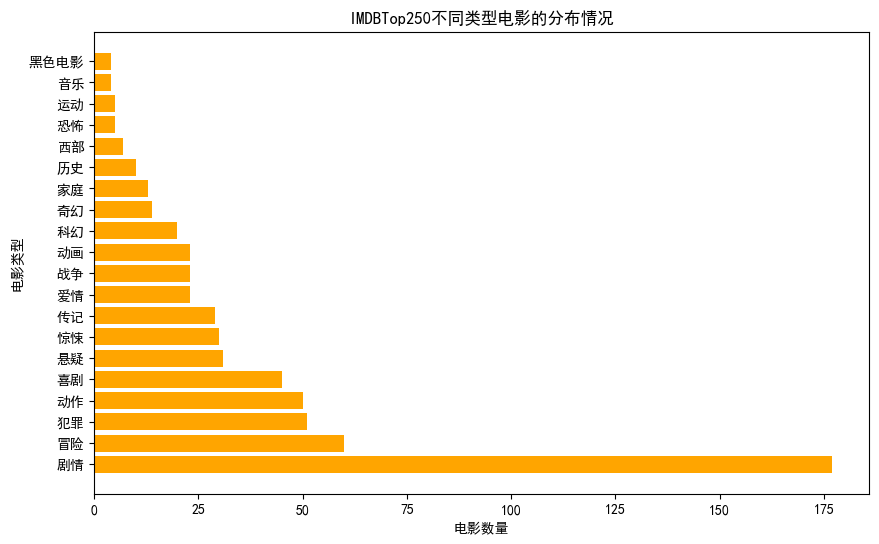

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('IMDBTop250.csv')

genres = df['genre'].str.split(',').sum()

genre_counts = dict(Counter(genres))

genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:20]}

label_dict = {
    'Action': '动作',
    'Adventure': '冒险',
    'Animation': '动画',
    'Biography': '传记',
    'Comedy': '喜剧',
    'Crime': '犯罪',
    'Drama': '剧情',
    'Family': '家庭',
    'Fantasy': '奇幻',
    'Film-Noir': '黑色电影',
    'History': '历史',
    'Horror': '恐怖',
    'Music': '音乐',
    'Musical': '音乐剧',
    'Mystery': '悬疑',
    'Romance': '爱情',
    'Sci-Fi': '科幻',
    'Sport': '运动',
    'Thriller': '惊悚',
    'War': '战争',
    'Western': '西部'
}

plt.figure(figsize=(10, 6))
plt.barh([label_dict[key] for key in genre_counts.keys()], genre_counts.values(), color='orange')
plt.xlabel('电影数量')
plt.ylabel('电影类型')
plt.title('IMDBTop250不同类型电影的分布情况')
plt.show()

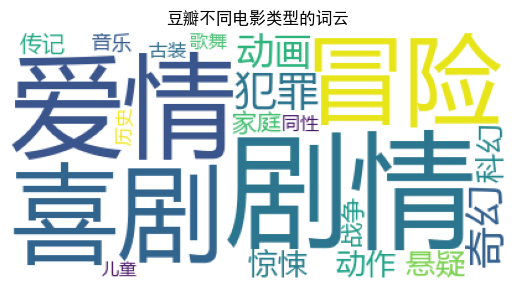

In [13]:
import pandas as pd
import numpy as np
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('DouBanTop250.csv')

genres = df['类型'].str.split(' ').sum()
genre_counts = dict(Counter(genres))

genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:20]}


seg_list = jieba.cut(' '.join(genre_counts))
wordcloud = WordCloud(
    background_color='white',
    font_path='msyh.ttc',
    max_words=20,
    min_font_size=10,
    max_font_size=100,
).generate(" ".join(genre_counts))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('豆瓣不同电影类型的词云')
plt.show()

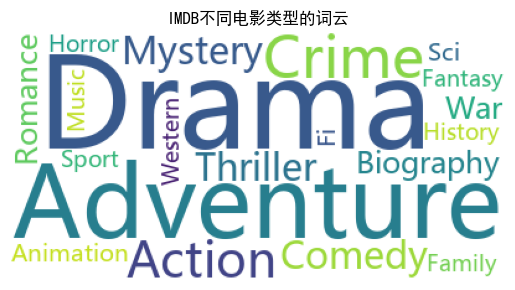

In [14]:
import pandas as pd
import numpy as np
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('IMDBTop250.csv')

genres = df['genre'].str.split(',').sum()

genre_counts = dict(Counter(genres))

genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:20]}

words = []
for types in df['genre']:
    for word in types.split():
        if len(word) > 1:
            words.append(word)
        else:
            words.append(types)

seg_list = jieba.cut(' '.join(words))

wordcloud = WordCloud(
    background_color='white',
    font_path='msyh.ttc',
    max_words=20,
    min_font_size=10,
    max_font_size=100,
).generate(" ".join(genre_counts))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('IMDB不同电影类型的词云')
plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\袁滨\AppData\Local\Temp\jieba.cache
Loading model cost 0.345 seconds.
Prefix dict has been built successfully.


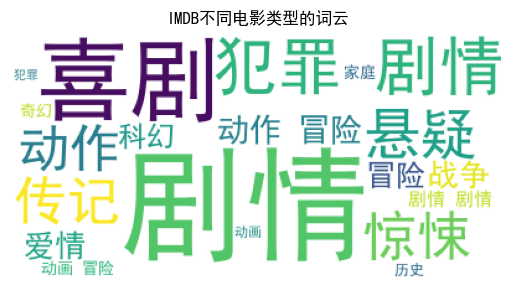

In [15]:
import pandas as pd
import numpy as np
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('IMDBTop250.csv')

genres = df['genre'].str.split(',').sum()

genre_counts = dict(Counter(genres))

genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:20]}

label_dict = {
    'Action': '动作',
    'Adventure': '冒险',
    'Animation': '动画',
    'Biography': '传记',
    'Comedy': '喜剧',
    'Crime': '犯罪',
    'Drama': '剧情',
    'Family': '家庭',
    'Fantasy': '奇幻',
    'Film-Noir': '黑色电影',
    'History': '历史',
    'Horror': '恐怖',
    'Music': '音乐',
    'Musical': '音乐剧',
    'Mystery': '悬疑',
    'Romance': '爱情',
    'Sci-Fi': '科幻',
    'Sport': '运动',
    'Thriller': '惊悚',
    'War': '战争',
    'Western': '西部'
}

words = []
for types in df['genre']:
    for word in types.split(','):
        if word.strip() in label_dict:
            words.append(label_dict[word.strip()])
        else:
            words.append(word.strip())

seg_list = jieba.cut(','.join(words), cut_all=False)
seg_list = ','.join(seg_list).split()

font_path = 'simhei.ttf'

wordcloud = WordCloud(
    background_color='white',
    font_path=font_path,
    max_words=20,
    min_font_size=10,
    max_font_size=100,
).generate(",".join(seg_list))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('IMDB不同电影类型的词云')
plt.show()

通过对两者电影类型分布数据的分析，我们发现两者都是剧情片占据了绝对的主导地位，豆瓣排名2、3的分别为爱情、喜剧，而IMDb排名2、3的分别为冒险、犯罪，这一点可以看出豆瓣用户更偏向于感性的电影，而IMDB用户偏向于刺激的动作电影。而反观当下最热门题材之一的科幻，在两个榜单占据的比重都很少。

四、Top250的评分分布

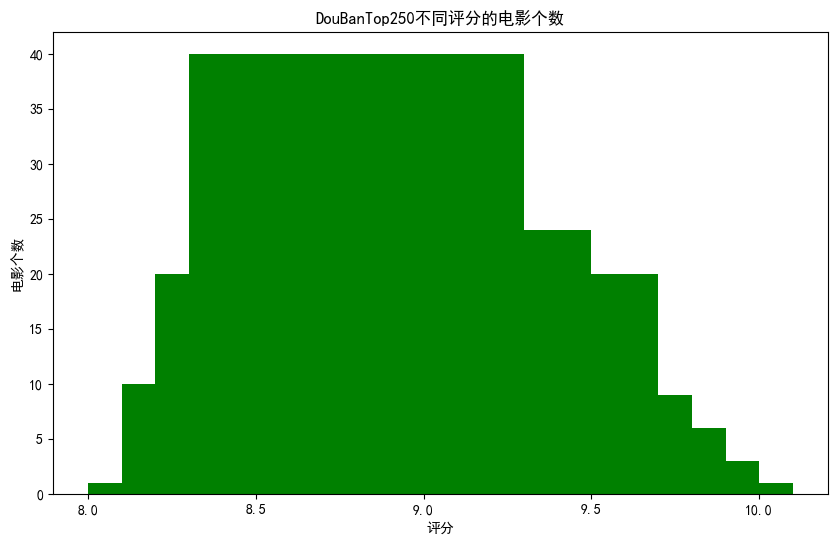

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv', encoding='utf-8')

rating_counts = df['评分'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='green')
plt.title('DouBanTop250不同评分的电影个数')
plt.xlabel('评分')
plt.ylabel('电影个数')
plt.show()

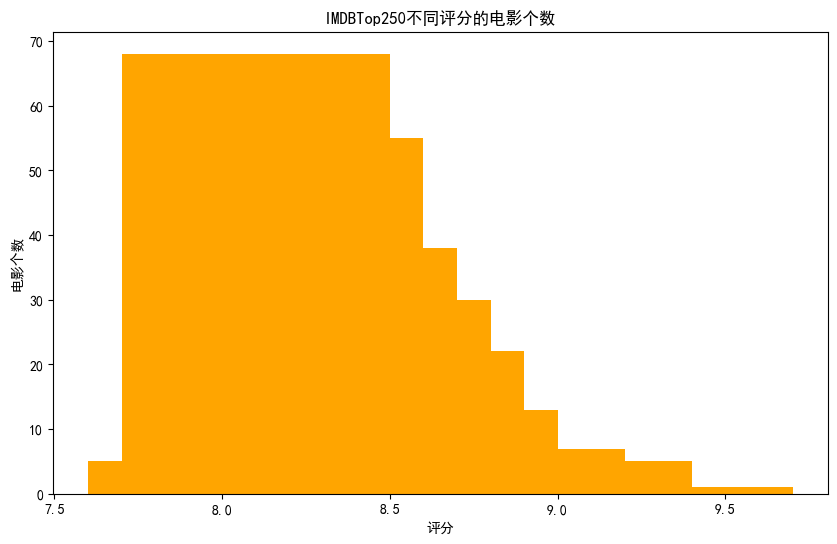

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df = pd.read_csv('IMDBTop250.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df['rating'] = pd.to_numeric(df['rating'])

df = df.dropna(subset=['rating'])

rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='orange')
plt.title('IMDBTop250不同评分的电影个数')
plt.xlabel('评分')
plt.ylabel('电影个数')
plt.show()

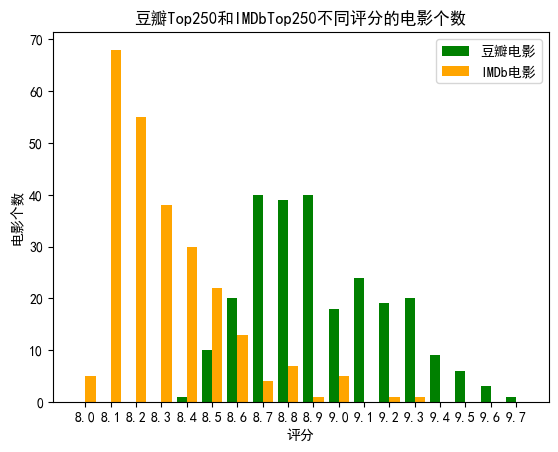

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

df_douban = pd.read_csv('DouBanTop250.csv', encoding='utf-8')

rating_counts_douban = df_douban['评分'].value_counts().sort_index()

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df_imdb = pd.read_csv('IMDBTop250.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df_imdb['rating'] = pd.to_numeric(df_imdb['rating'])
df_imdb = df_imdb.dropna(subset=['rating'])

rating_counts_imdb = df_imdb['rating'].value_counts().sort_index()

all_ratings = sorted(set(list(rating_counts_douban.index) + list(rating_counts_imdb.index)))

douban_values = [rating_counts_douban.get(rating, 0) for rating in all_ratings]
imdb_values = [rating_counts_imdb.get(rating, 0) for rating in all_ratings]

fig, ax = plt.subplots()
bar_width = 0.4
index = np.arange(len(all_ratings))

bar1 = ax.bar(index, douban_values, bar_width, label='豆瓣电影', color='green')
bar2 = ax.bar(index + bar_width, imdb_values, bar_width, label='IMDb电影', color='orange')

ax.set_xlabel('评分')
ax.set_ylabel('电影个数')
ax.set_title('豆瓣Top250和IMDbTop250不同评分的电影个数')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(all_ratings)
ax.legend()

plt.show()

In [19]:
import pandas as pd

df_douban = pd.read_csv('DouBanTop250.csv', encoding='utf-8')

mean_douban = df_douban['评分'].mean()

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df_imdb = pd.read_csv('IMDBTop250.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

mean_imdb = df_imdb['rating'].mean()

print('豆瓣 Top250 的均分：', mean_douban)
print('IMDb Top250 的均分：', mean_imdb)

豆瓣 Top250 的均分： 8.9356
IMDb Top250 的均分： 8.3072


对以上两组数据进行分析，发现豆瓣电影的总体评分比IMDB要高，豆瓣的均分为8.9356，而IMDb的均分为8.3072。我们可以看出豆瓣对于电影较为温和，更倾向于打高分，而IMDB对于电影较为苛刻，高分并不多，这可能是IMDB用户中专业电影人士占比较大导致的。

五、Top250的评分和评价人数的分布

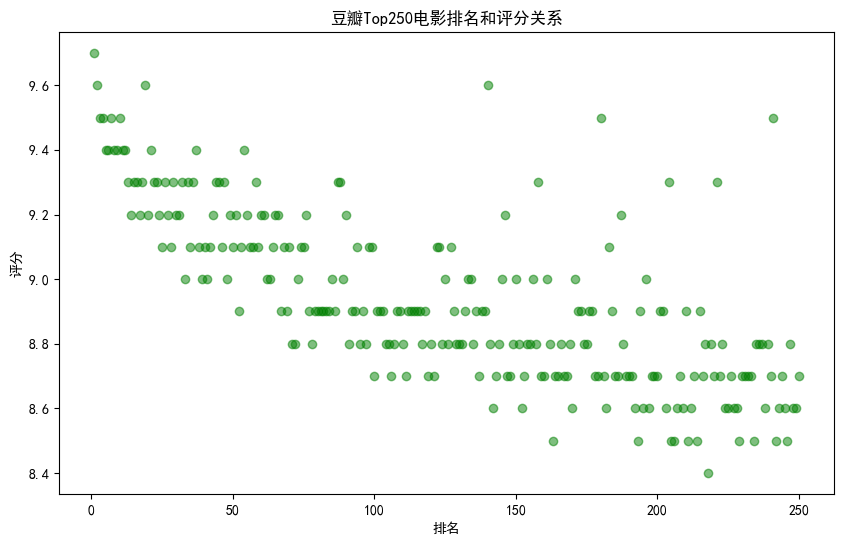

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['排名'], df['评分'], alpha=0.5, color='green')
plt.title('豆瓣Top250电影排名和评分关系')
plt.xlabel('排名')
plt.ylabel('评分')
plt.show()

对图像进行拟合

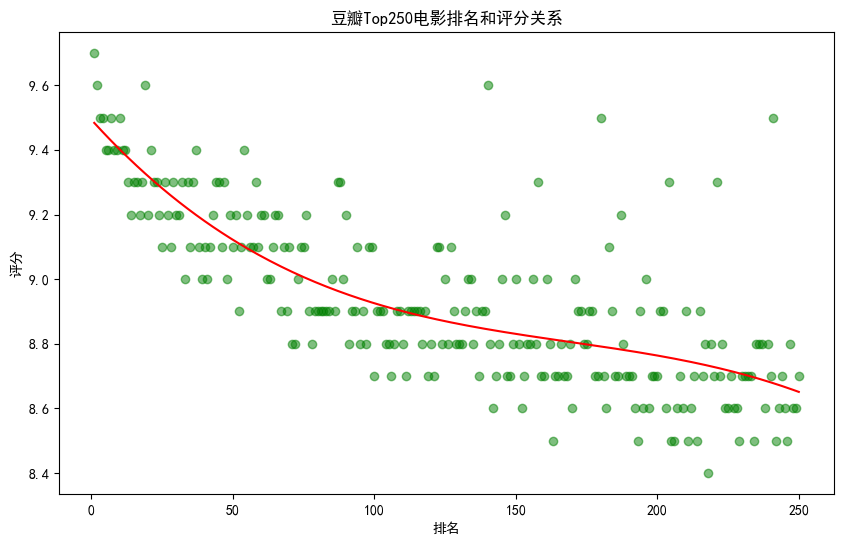

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('DouBanTop250.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['排名'], df['评分'], alpha=0.5, color='green')
plt.title('豆瓣Top250电影排名和评分关系')
plt.xlabel('排名')
plt.ylabel('评分')

x = df['排名']
y = df['评分']
fit = np.polyfit(x, y, 3)
fit_fn = np.poly1d(fit)

x_plot = np.linspace(1, 250, 250)
plt.plot(x_plot, fit_fn(x_plot), color='red')

plt.show()

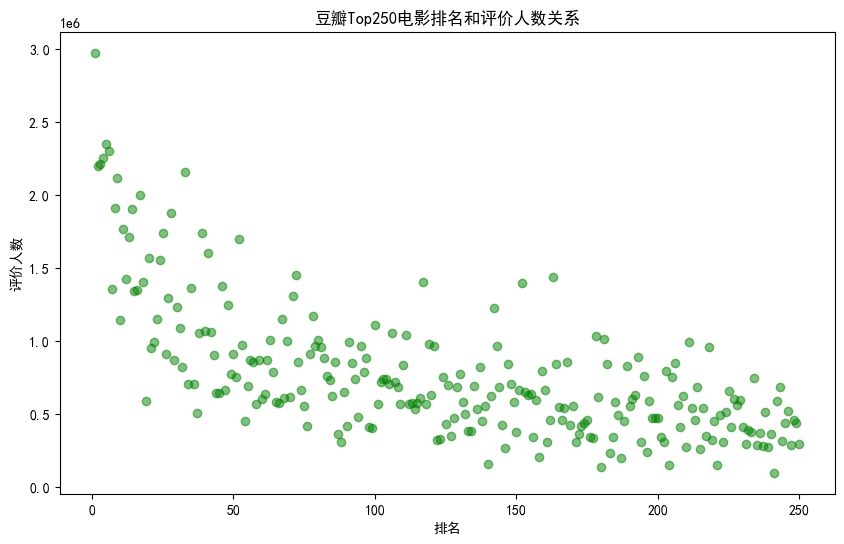

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['排名'], df['评价人数'], alpha=0.5, color='green')
plt.title('豆瓣Top250电影排名和评价人数关系')
plt.xlabel('排名')
plt.ylabel('评价人数')
plt.show()

对图像进行拟合

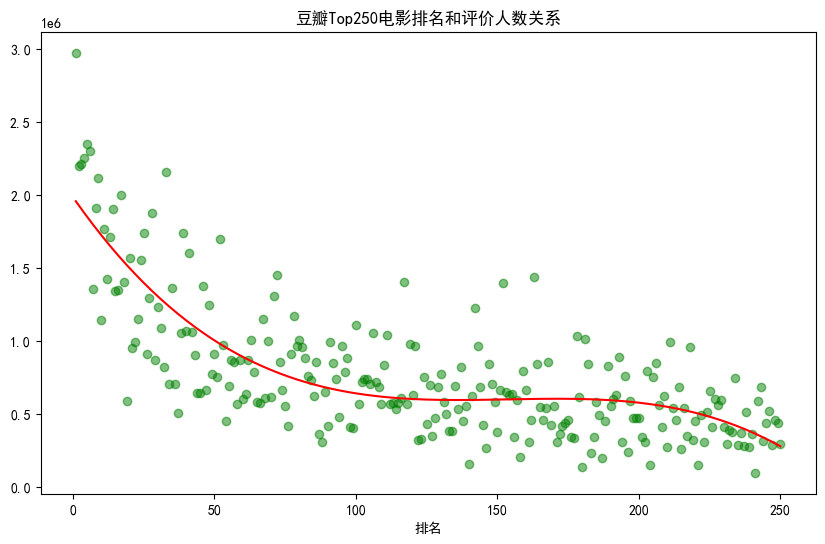

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['排名'], df['评价人数'], alpha=0.5, color='green')
plt.title('豆瓣Top250电影排名和评价人数关系')
plt.xlabel('排名')
plt.ylabel('')

x = df['排名']
y = df['评价人数']
fit = np.polyfit(x, y, 3)
fit_fn = np.poly1d(fit)

x_plot = np.linspace(1, 250, 250)
plt.plot(x_plot, fit_fn(x_plot), color='red')

plt.show()

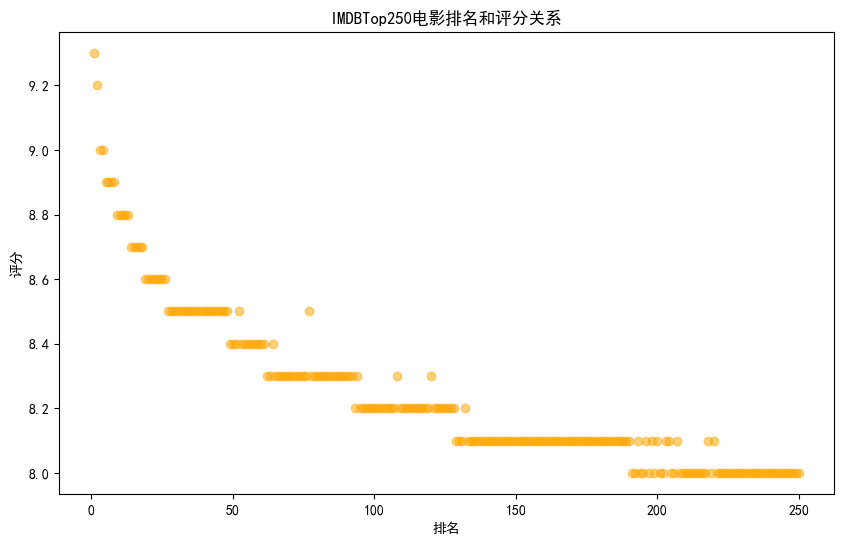

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df = pd.read_csv('imdb_top250_movies.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df['imdbRating'] = pd.to_numeric(df['imdbRating'])
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

df = df.dropna(subset=['imdbRating', 'Num'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Num'], df['imdbRating'], alpha=0.5, color='orange')
plt.title('IMDBTop250电影排名和评分关系')
plt.xlabel('排名')
plt.ylabel('评分')
plt.show()

对图像进行拟合

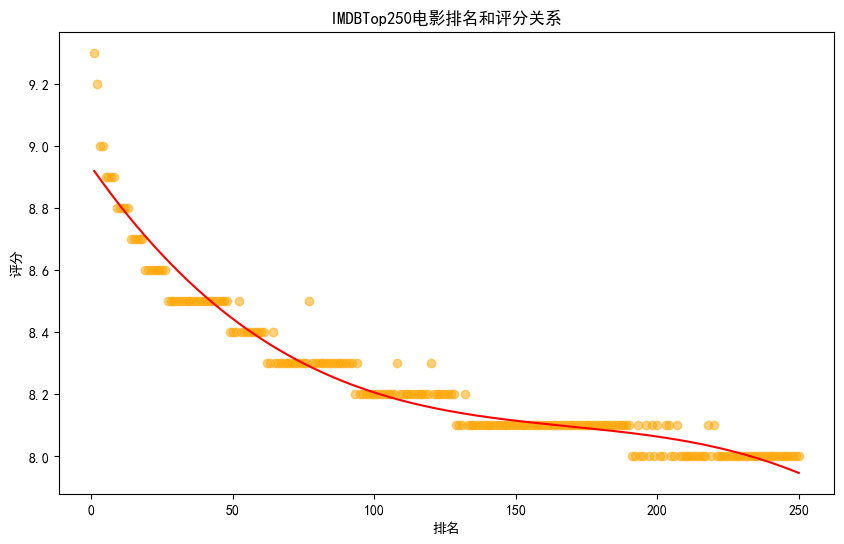

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df = pd.read_csv('imdb_top250_movies.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df['imdbRating'] = pd.to_numeric(df['imdbRating'])
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

df = df.dropna(subset=['imdbRating', 'Num'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Num'], df['imdbRating'], alpha=0.5, color='orange')
plt.title('IMDBTop250电影排名和评分关系')
plt.xlabel('排名')
plt.ylabel('评分')


x = df['Num']
y = df['imdbRating']
fit = np.polyfit(x, y, 3)
fit_fn = np.poly1d(fit)

x_plot = np.linspace(1, 250, 250)
plt.plot(x_plot, fit_fn(x_plot), color='red')

plt.show()

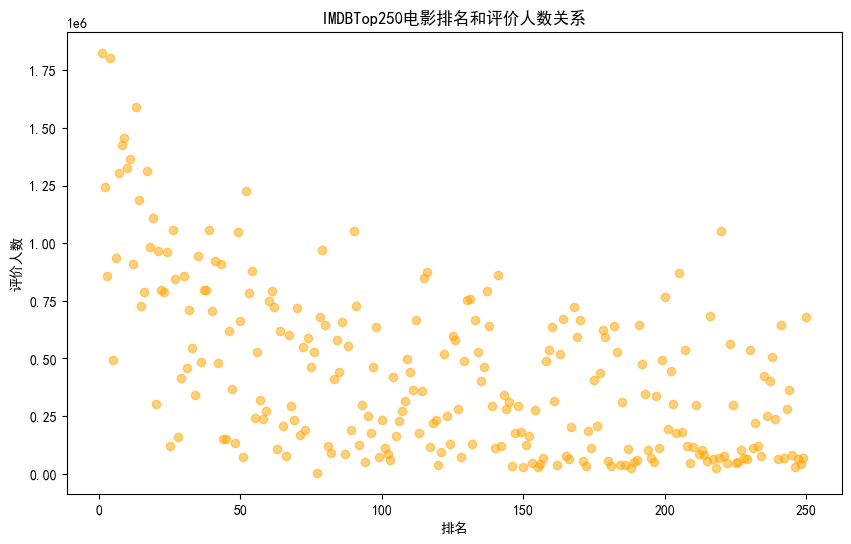

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
success = False
for encoding in encoding_list:
    try:
        df = pd.read_csv('imdb_top250_movies.csv', encoding=encoding)
        success = True
        break
    except UnicodeDecodeError:
        pass

if not success:
    raise Exception("Failed to read the CSV file with all attempted encodings")

df['imdbVotes'] = pd.to_numeric(df['imdbVotes'].str.replace(',', ''), errors='coerce')
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

df = df.dropna(subset=['imdbVotes', 'Num'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Num'], df['imdbVotes'], alpha=0.5, color='orange')
plt.title('IMDBTop250电影排名和评价人数关系')
plt.xlabel('排名')
plt.ylabel('评价人数')
plt.show()

对图像进行拟合

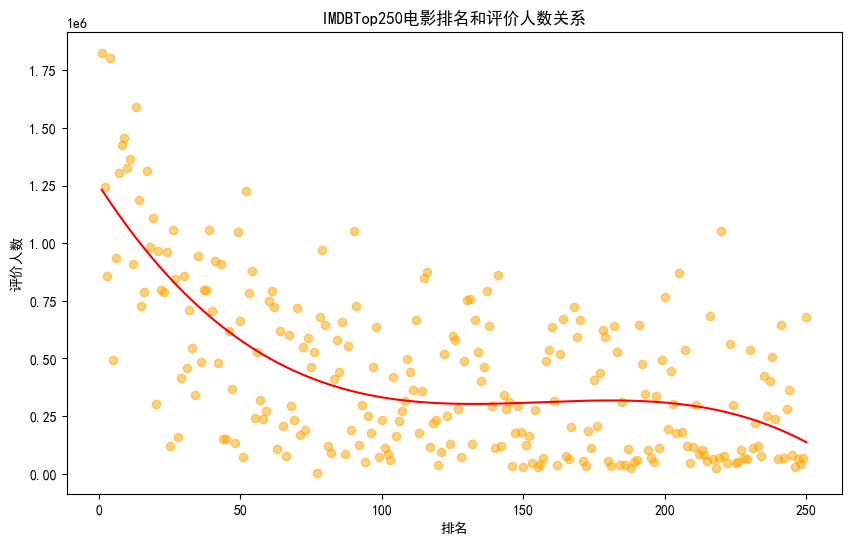

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df = pd.read_csv('imdb_top250_movies.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df['imdbVotes'] = pd.to_numeric(df['imdbVotes'].str.replace(',', ''), errors='coerce')
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

df = df.dropna(subset=['imdbVotes', 'Num'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Num'], df['imdbVotes'], alpha=0.5, color='orange')
plt.title('IMDBTop250电影排名和评价人数关系')
plt.xlabel('排名')
plt.ylabel('评价人数')

x = df['Num']
y = df['imdbVotes']
fit = np.polyfit(x, y, 3)
fit_fn = np.poly1d(fit)

x_plot = np.linspace(1, 250, 250)
plt.plot(x_plot, fit_fn(x_plot), color='red')

plt.show()

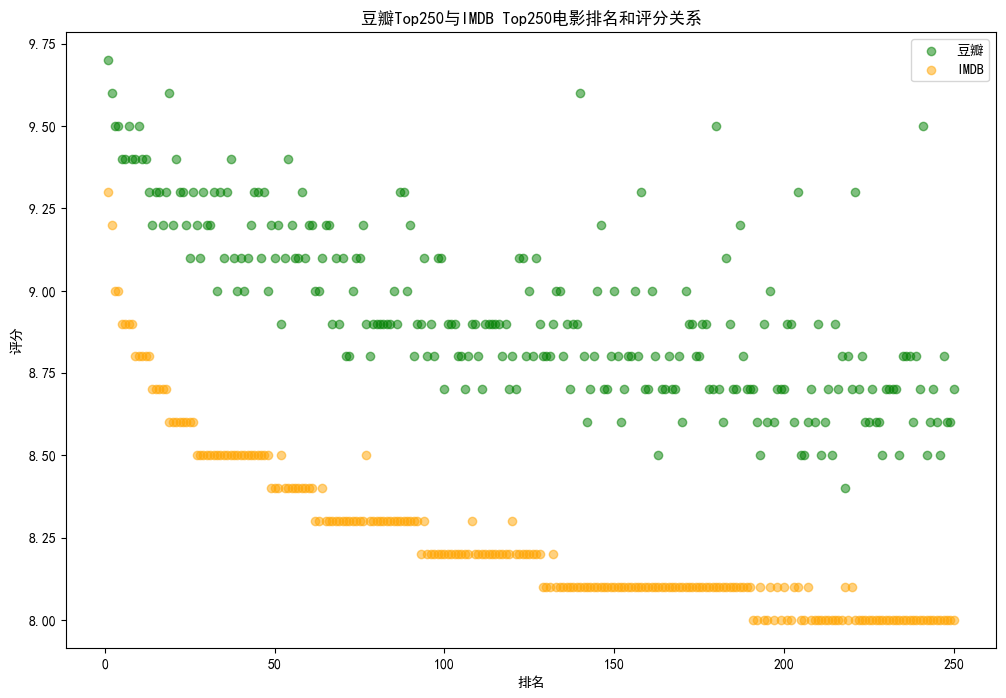

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(12, 8))

df = pd.read_csv('DouBanTop250.csv')

plt.scatter(df['排名'], df['评分'], alpha=0.5, color='green', label='豆瓣')

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df = pd.read_csv('imdb_top250_movies.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df['imdbRating'] = pd.to_numeric(df['imdbRating'])
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

df = df.dropna(subset=['imdbRating', 'Num'])

plt.scatter(df['Num'], df['imdbRating'], alpha=0.5, color='orange', label='IMDB')

plt.title('豆瓣Top250与IMDB Top250电影排名和评分关系')
plt.xlabel('排名')
plt.ylabel('评分')
plt.legend()
plt.show()

我们能够看出豆瓣评分普遍比IMDB高，但IMDB的分布更加整齐和集中，方差更小，层次感很强，即高分的排名高，低分的排名低，例外情况很少；而豆瓣的分布更为杂乱和分散，方差更大，很多排名不是那么靠前的电影的评分也很高，基本看不出断层的感觉。

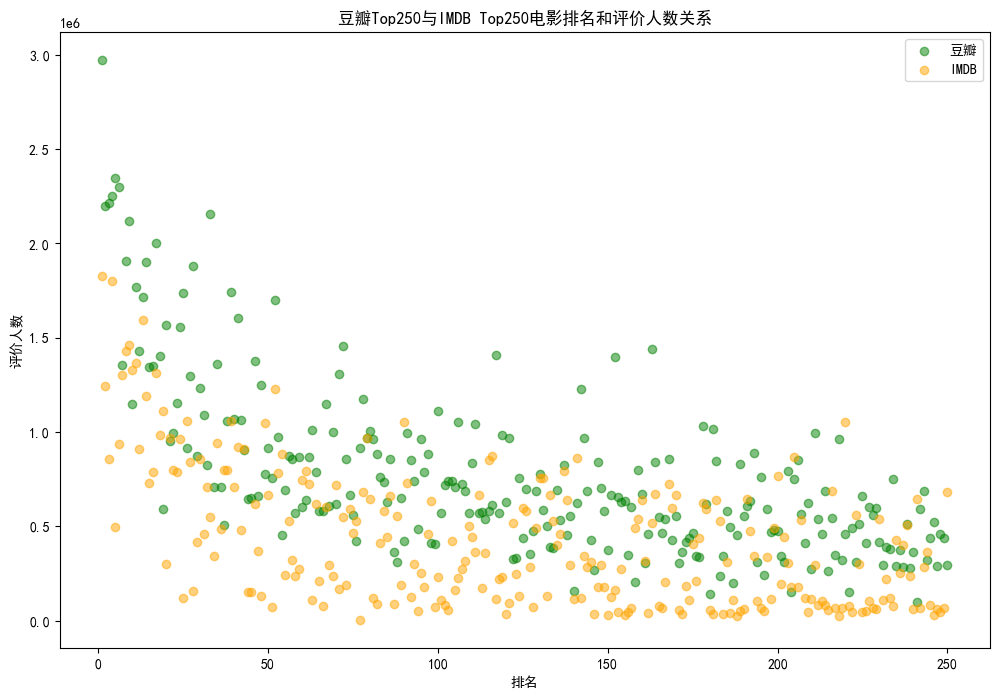

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(12, 8))

df = pd.read_csv('DouBanTop250.csv')

plt.scatter(df['排名'], df['评价人数'], alpha=0.5, color='green', label='豆瓣')

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df = pd.read_csv('imdb_top250_movies.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df['imdbVotes'] = pd.to_numeric(df['imdbVotes'].str.replace(',', ''), errors='coerce')
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

df = df.dropna(subset=['imdbVotes', 'Num'])

plt.scatter(df['Num'], df['imdbVotes'], alpha=0.5, color='orange', label='IMDB')

plt.title('豆瓣Top250与IMDB Top250电影排名和评价人数关系')
plt.xlabel('排名')
plt.ylabel('评价人数')
plt.legend()
plt.show()

我们可以看出豆瓣评价人数普遍比IMDB多，但实际IMDB用户应该比豆瓣用户要多，这里可能是由于IMDB的评价人数经过筛选了（后面会提到）

六、对豆瓣和IMDBTop250排名标准的简单猜测与模拟

根据一般常识进行初步猜测：影响排名的因素分别为评分和评价人数。然而两者在排名标准中谁占比较多呢?
首先对豆瓣Top250进行分析，如果与两者都有关，初步假设为加权平均法。即评价参数=(c)*v/V+(1-c)*s/S 其中v为评价人数，V为平均值，s为评分，S为平均值，c为比例系数

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('DouBanTop250.csv', encoding='utf-8')
ratings = df['评分']
num_ratings = df['评价人数']

S = np.mean(ratings)
V = np.mean(num_ratings)

normalized_ratings = ratings / S
normalized_num_ratings = num_ratings / V

def update_plot(weight1):
    weight2 = 1 - weight1

    weights = [weight1, weight2]
    weighted_sum = weights[0] * normalized_ratings + weights[1] * normalized_num_ratings

    rankings = df['排名']

    plt.scatter(rankings, weighted_sum)
    plt.xlabel('排名')
    plt.ylabel('评价参数')
    plt.title('豆瓣排名和评价参数的关系')
    plt.show()

interact(update_plot, weight1=(0, 1, 0.01))

interactive(children=(FloatSlider(value=0.0, description='weight1', max=1.0, step=0.01), Output()), _dom_class…

<function __main__.update_plot(weight1)>

然后再对imdbTop250套用同样的公式

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

encoding_list = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encoding_list:
    try:
        df = pd.read_csv('imdb_top250_movies.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df['imdbVotes'] = pd.to_numeric(df['imdbVotes'].str.replace(',', ''), errors='coerce')
df['imdbRating'] = pd.to_numeric(df['imdbRating'], errors='coerce')

df = df.dropna(subset=['imdbVotes', 'imdbRating'])
ratings = df['imdbRating']
num_ratings = df['imdbVotes']

S = np.mean(ratings)
V = np.mean(num_ratings)

normalized_ratings = ratings / S
normalized_num_ratings = num_ratings / V

def update_plot(weight1):
    weight2 = 1 - weight1

    weights = [weight1, weight2]
    weighted_sum = weights[0] * normalized_ratings + weights[1] * normalized_num_ratings

    rankings = df['Num']

    plt.scatter(rankings, weighted_sum)
    plt.xlabel('排名')
    plt.ylabel('评价参数')
    plt.title('IMDB排名和评价参数的关系')
    plt.show()

interact(update_plot, weight1=(0, 1, 0.01))

interactive(children=(FloatSlider(value=0.0, description='weight1', max=1.0, step=0.01), Output()), _dom_class…

<function __main__.update_plot(weight1)>

通过上述实验，我们发现加权平均值的方法和真实情况仍有很大差距。但通过实验，我们可以看出评价参数的影响因素中，应该是评分占据了更大的比重。

通过查找资料，发现豆瓣并未公布其排名机制，而IMDB的排名机制采用了贝叶斯统计的算法得出的加权分，公式如下：weighted rank = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 其中R是用普通的方法计算出的平均分，v为投票人数（需要注意的是，只有经常投票者才会被计算在内，即imdb的投票人数显示的是经常投票者，这样做能够在一定程度上减少刷分行为）m为进入imdb top 250需要的最小票数，C 为目前所有电影的平均得分。

总结：

豆瓣Top250和IMDBTop250榜单存在着不少共性，但也有着各自鲜明的特性。豆瓣倾向于20世纪之后的电影，而IMDB对于20世纪之前的老片也同样赞誉有加；豆瓣偏好于温情的题材，而IMDB偏向于更加严肃乃至残酷的题材；豆瓣的评分较为宽容，而IMDB则较为苛刻。